In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("G:\PLACEMENTS\projects\Covid19_New\case_time_series.csv", parse_dates = ['Date'], index_col='Date')
df

,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,,
2020-01-30,30-01-2020,1,1,0,0,0,0
2020-01-31,31-01-2020,0,1,0,0,0,0
2020-02-01,01-02-2020,0,1,0,0,0,0
2020-02-02,02-02-2020,1,2,0,0,0,0
2020-02-03,03-02-2020,1,3,0,0,0,0
...,...,...,...,...,...,...,...
2021-08-03,03-08-2021,42530,31767766,36552,30925183,561,425198
2021-08-04,04-08-2021,42797,31810563,41873,30967056,532,425730
2021-08-05,05-08-2021,45005,31855568,40906,31007962,465,426195


#EXTRACTING 3 MONTHS DATA:

In [3]:
Data = df.loc['2021-05-01':'2021-07-31']
Data

,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,,
2021-05-01,01-05-2021,392576,19549555,308688,15981706,3685,214933
2021-05-02,02-05-2021,370090,19919645,300004,16281710,3423,218356
2021-05-03,03-05-2021,355769,20275414,318910,16600620,3439,221795
2021-05-04,04-05-2021,382847,20658261,337699,16938319,3786,225581
2021-05-05,05-05-2021,412624,21070885,330718,17269037,3979,229560
...,...,...,...,...,...,...,...
2021-07-27,27-07-2021,42971,31483244,41653,30655426,641,421464
2021-07-28,28-07-2021,43165,31526409,38537,30693963,640,422104
2021-07-29,29-07-2021,44671,31571080,42115,30736078,549,422653


#Copied Data to New Variable

In [4]:
India_data = Data.copy()
India_data = India_data.reset_index()
India_data

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2021-05-01,01-05-2021,392576,19549555,308688,15981706,3685,214933
1,2021-05-02,02-05-2021,370090,19919645,300004,16281710,3423,218356
2,2021-05-03,03-05-2021,355769,20275414,318910,16600620,3439,221795
3,2021-05-04,04-05-2021,382847,20658261,337699,16938319,3786,225581
4,2021-05-05,05-05-2021,412624,21070885,330718,17269037,3979,229560
...,...,...,...,...,...,...,...,...
87,2021-07-27,27-07-2021,42971,31483244,41653,30655426,641,421464
88,2021-07-28,28-07-2021,43165,31526409,38537,30693963,640,422104
89,2021-07-29,29-07-2021,44671,31571080,42115,30736078,549,422653
90,2021-07-30,30-07-2021,41499,31612579,37320,30773398,598,423251


In [5]:
India_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             92 non-null     datetime64[ns]
 1   Date_YMD         92 non-null     object        
 2   Daily Confirmed  92 non-null     int64         
 3   Total Confirmed  92 non-null     int64         
 4   Daily Recovered  92 non-null     int64         
 5   Total Recovered  92 non-null     int64         
 6   Daily Deceased   92 non-null     int64         
 7   Total Deceased   92 non-null     int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 5.9+ KB


#Getting Month_Day from Date :

In [6]:
India_data['month_day'] = India_data['Date'].apply(lambda x: x.strftime('%B-%d'))
India_data['month_day']

0      May-01
1      May-02
2      May-03
3      May-04
4      May-05
       ...   
87    July-27
88    July-28
89    July-29
90    July-30
91    July-31
Name: month_day, Length: 92, dtype: object

#Grouping Month_Day by Total Confirmed Cases : 

In [7]:
df_tconfirmed = India_data.groupby('month_day', sort=False).sum()['Total Confirmed'].reset_index()
df_tconfirmed

,month_day,Total Confirmed
0,May-01,19549555
1,May-02,19919645
2,May-03,20275414
3,May-04,20658261
4,May-05,21070885
...,...,...
87,July-27,31483244
88,July-28,31526409
89,July-29,31571080
90,July-30,31612579


## Total Confirmed Cases in India

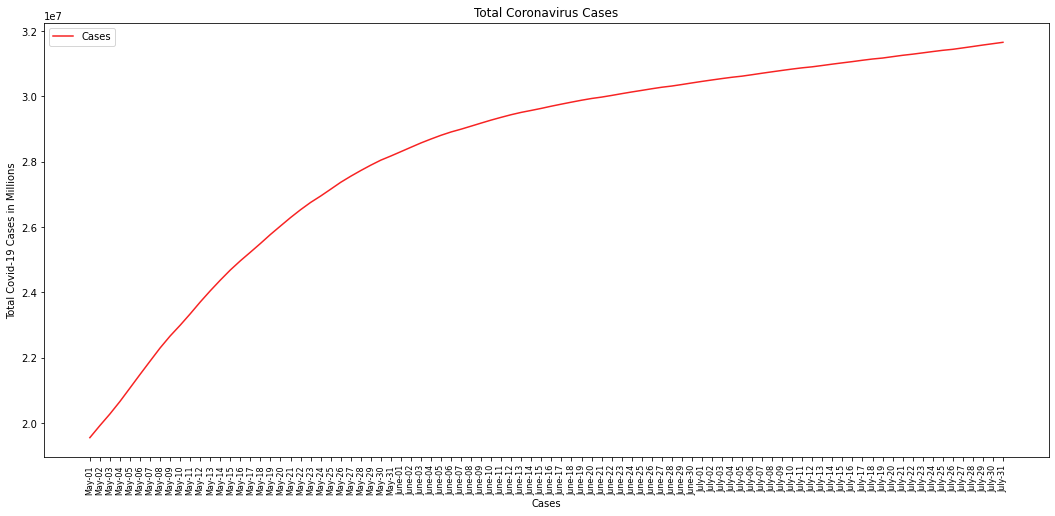

In [8]:
#setting the figure size and plotting graph
plt.figure(figsize=(18, 8))
plt.plot(df_tconfirmed['month_day'], df_tconfirmed['Total Confirmed'], color='#f72323', label='Cases')
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Cases')
plt.ylabel('Total Covid-19 Cases in Millions')
plt.title('Total Coronavirus Cases')
plt.legend()
plt.show()

#Grouping Month_day by Daily Confirmed Cases :

In [9]:
df_Dailyc = India_data.groupby('month_day', sort=False).sum()['Daily Confirmed'].reset_index()
df_Dailyc

,month_day,Daily Confirmed
0,May-01,392576
1,May-02,370090
2,May-03,355769
3,May-04,382847
4,May-05,412624
...,...,...
87,July-27,42971
88,July-28,43165
89,July-29,44671
90,July-30,41499


## Daily New Cases in India

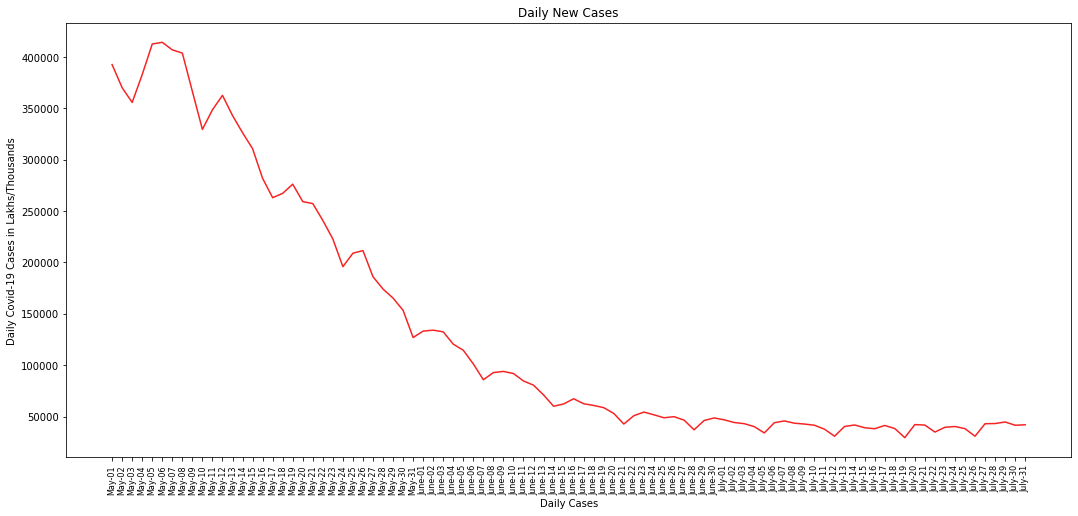

In [10]:
#setting the figure size and plotting graph
plt.figure(figsize=(18, 8))
plt.plot(df_Dailyc['month_day'], df_Dailyc['Daily Confirmed'], color='#f72323')
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Daily Cases')
plt.ylabel('Daily Covid-19 Cases in Lakhs/Thousands')
plt.title('Daily New Cases')
plt.show()

#Grouping Month_day by Total Deceased Cases :

In [11]:
df_tdeaths = India_data.groupby('month_day', sort=False).sum()['Total Deceased'].reset_index()
df_tdeaths

,month_day,Total Deceased
0,May-01,214933
1,May-02,218356
2,May-03,221795
3,May-04,225581
4,May-05,229560
...,...,...
87,July-27,421464
88,July-28,422104
89,July-29,422653
90,July-30,423251


## Total Coronavirus Deaths in India

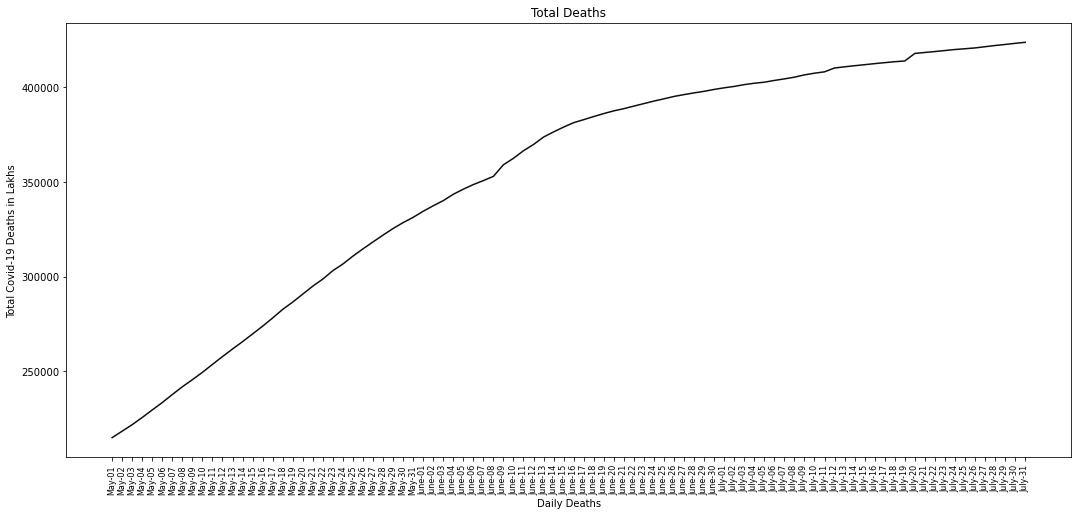

In [12]:
#setting the figure size and plotting graphs
plt.figure(figsize=(18, 8))
plt.plot(df_tdeaths['month_day'], df_tdeaths['Total Deceased'], color='#0f0d0d')
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Daily Deaths')
plt.ylabel('Total Covid-19 Deaths in Lakhs')
plt.title('Total Deaths')
plt.show()

#Grouping Month_day by Daily Deceased Cases :

In [13]:
df_dailyD = India_data.groupby('month_day', sort=False).sum()['Daily Deceased'].reset_index()
df_dailyD

,month_day,Daily Deceased
0,May-01,3685
1,May-02,3423
2,May-03,3439
3,May-04,3786
4,May-05,3979
...,...,...
87,July-27,641
88,July-28,640
89,July-29,549
90,July-30,598


## Daily Deaths in India

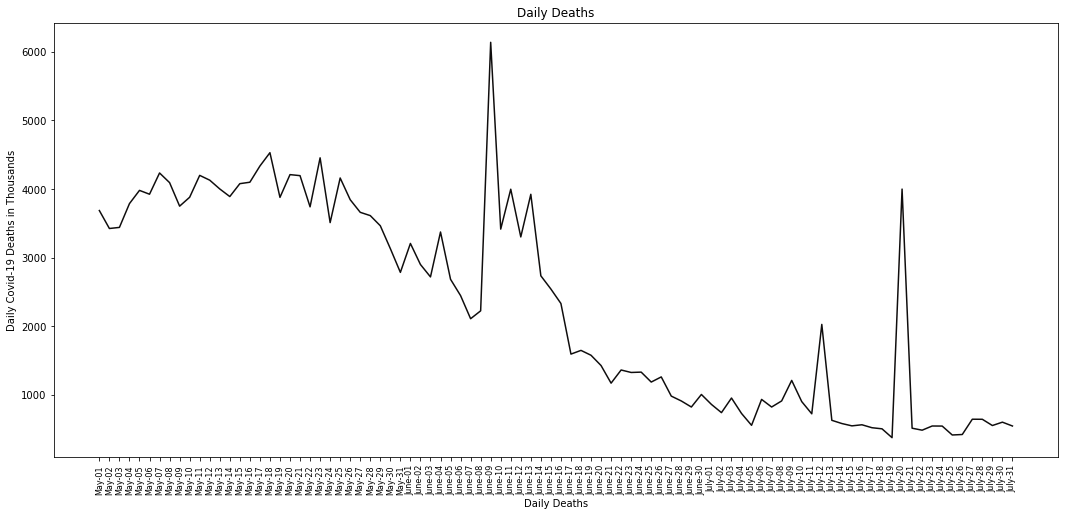

In [14]:
#setting the figure size and plotting graphs
plt.figure(figsize=(18, 8))
plt.plot(df_dailyD['month_day'], df_dailyD['Daily Deceased'], color='#0f0d0d')
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Daily Deaths')
plt.ylabel('Daily Covid-19 Deaths in Thousands')
plt.title('Daily Deaths')
plt.show()

#Grouping Month_day by Total Recovered Cases :

In [15]:
df_trecover = India_data.groupby('month_day', sort=False).sum()['Total Recovered'].reset_index()
df_trecover

,month_day,Total Recovered
0,May-01,15981706
1,May-02,16281710
2,May-03,16600620
3,May-04,16938319
4,May-05,17269037
...,...,...
87,July-27,30655426
88,July-28,30693963
89,July-29,30736078
90,July-30,30773398


## Total Recovered Cases in India

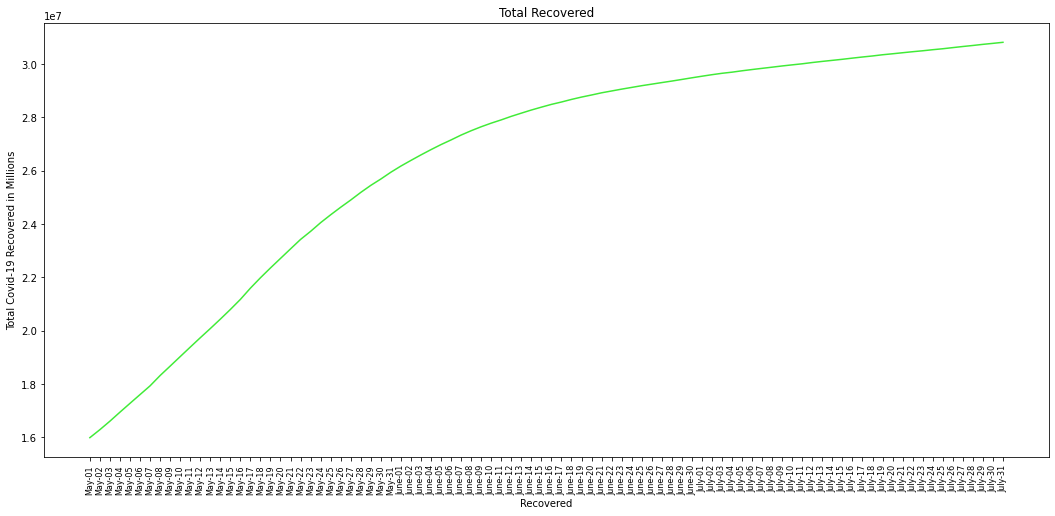

In [16]:
#setting the figure size and plotting graphs
plt.figure(figsize=(18, 8))
plt.plot(df_trecover['month_day'], df_trecover['Total Recovered'], color='#41eb38')
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Recovered')
plt.ylabel('Total Covid-19 Recovered in Millions')
plt.title('Total Recovered')
plt.show()

#Grouping Month_day by Daily Recovered Cases :

In [17]:
df_drecover = India_data.groupby('month_day', sort=False).sum()['Daily Recovered'].reset_index()
df_drecover

,month_day,Daily Recovered
0,May-01,308688
1,May-02,300004
2,May-03,318910
3,May-04,337699
4,May-05,330718
...,...,...
87,July-27,41653
88,July-28,38537
89,July-29,42115
90,July-30,37320


## Daily Recoveries in India

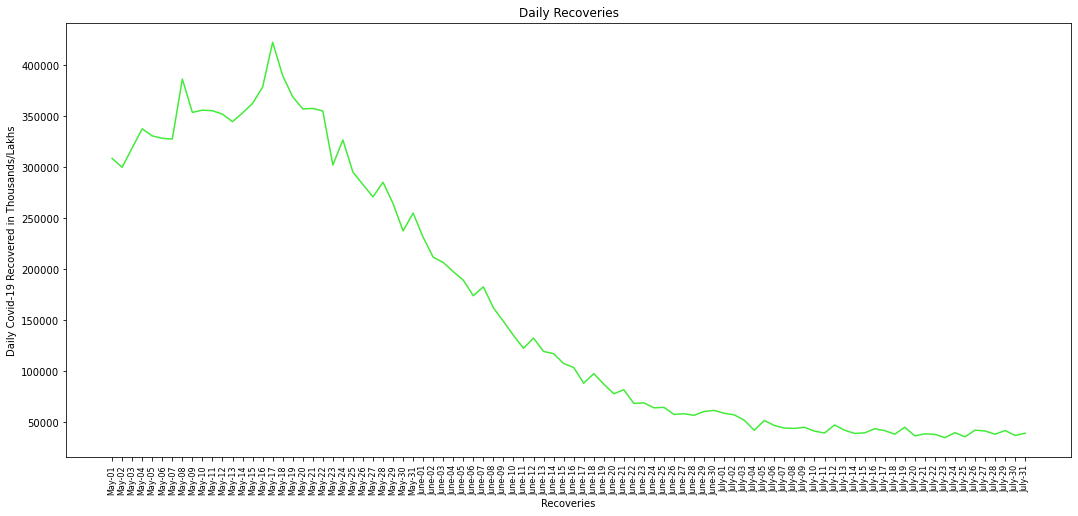

In [18]:
#setting the figure size and plotting graphs
plt.figure(figsize=(18, 8))
plt.plot(df_drecover['month_day'], df_drecover['Daily Recovered'], color='#41eb38')
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Recoveries')
plt.ylabel('Daily Covid-19 Recovered in Thousands/Lakhs')
plt.title('Daily Recoveries')
plt.show()

## Newly Infected vs. Newly Recovered in India

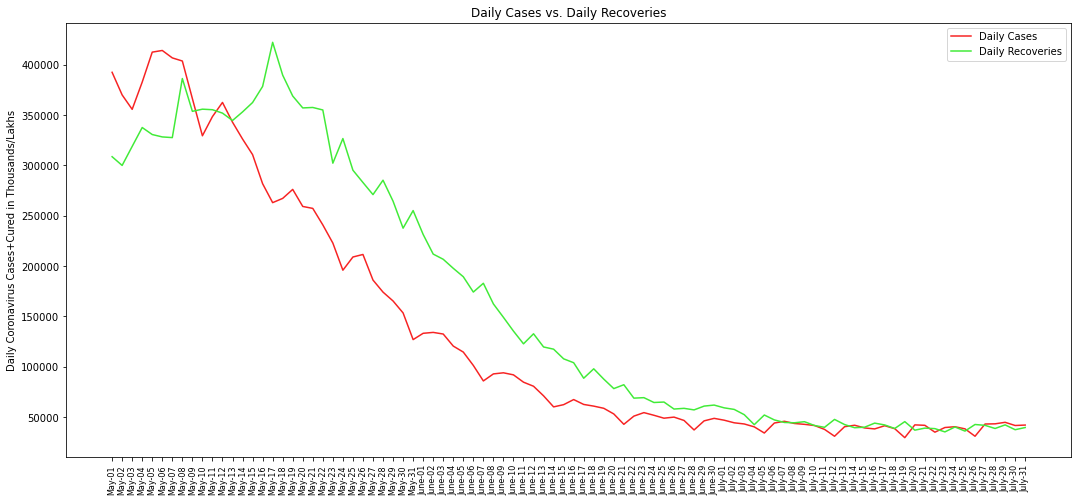

In [19]:
#setting the figure size and plotting graphs
plt.figure(figsize=(18, 8))
plt.plot(df_Dailyc['month_day'], df_Dailyc['Daily Confirmed'], color='#f72323', label='Daily Cases')
plt.plot(df_drecover['month_day'], df_drecover['Daily Recovered'], color='#41eb38', label='Daily Recoveries')
plt.xticks(rotation='vertical', size=8)
plt.ylabel('Daily Coronavirus Cases+Cured in Thousands/Lakhs')
plt.title('Daily Cases vs. Daily Recoveries')
plt.legend()
plt.show()